# Exploratory data analysis


In [1]:
### import libraries 

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

pd.set_option('display.max_columns',None)
%matplotlib inline

### What are the total sales made during a specific time period

In [2]:
# Load datasets
sales_path = "/Users/inazawaelectronics/Desktop/Data-Analyst-Intern-Project/BUDGET SALES ANALYSIS/Data/Sales.xlsx"
calendar_path = "/Users/inazawaelectronics/Desktop/Data-Analyst-Intern-Project/BUDGET SALES ANALYSIS/Data/Calender.xlsx"

sales_df = pd.read_excel(sales_path)
calendar_df = pd.read_excel(calendar_path)

# Merge Sales and Calendar datasets
merged_df = pd.merge(
    sales_df, 
    calendar_df, 
    left_on='OrderDate', 
    right_on='Date', 
    how='inner'
)

# Group by Year and calculate total sales
sales_by_year = merged_df.groupby('Year')['SalesAmount'].sum().reset_index()

# Display total sales by year
sales_by_year

,Year,SalesAmount
0,2014,7.072084e+06
1,2015,5.762134e+06
2,2016,1.647362e+07


### What are the monthly, quarterly, and yearly sales trends

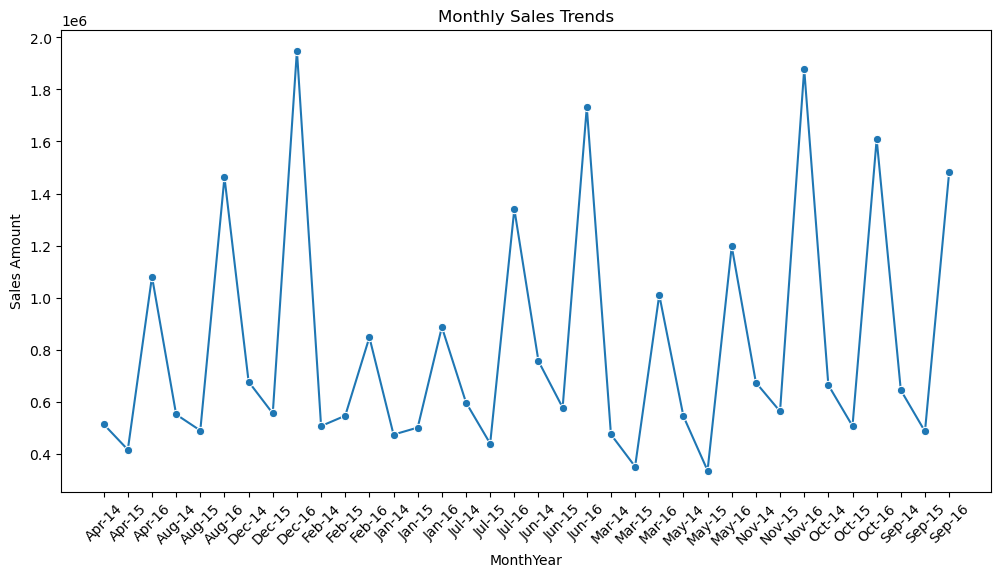

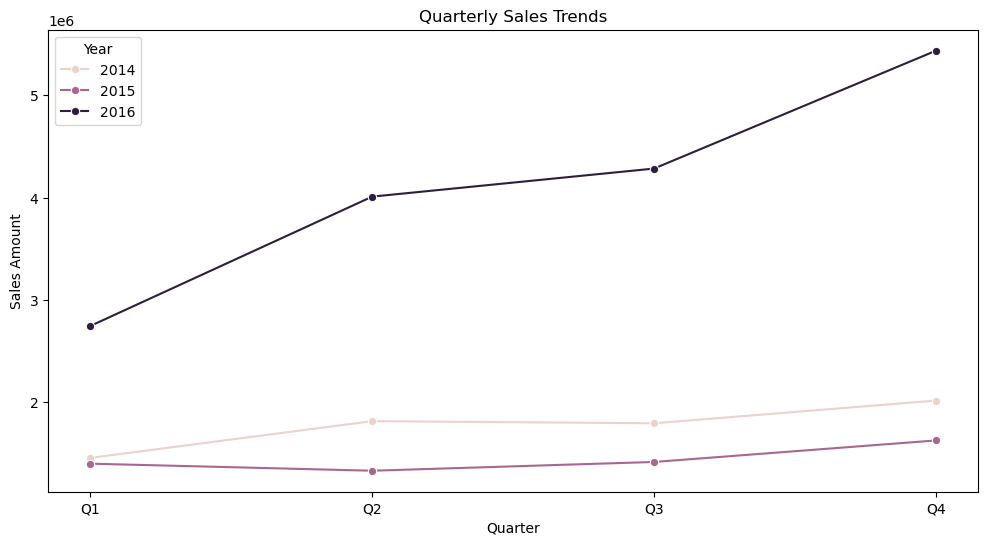

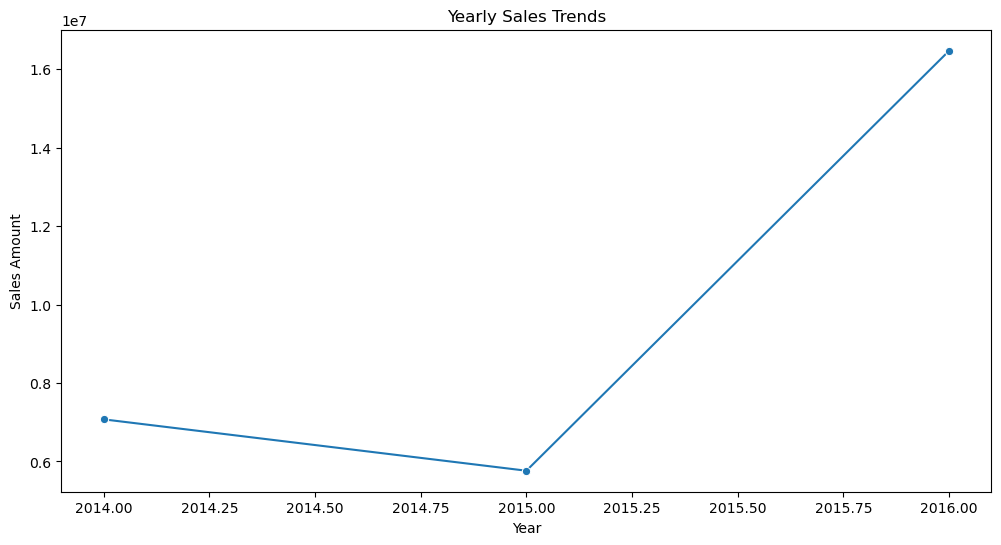

In [3]:
# Load datasets
sales_path = "/Users/inazawaelectronics/Desktop/Data-Analyst-Intern-Project/BUDGET SALES ANALYSIS/Data/Sales.xlsx"
calendar_path = "/Users/inazawaelectronics/Desktop/Data-Analyst-Intern-Project/BUDGET SALES ANALYSIS/Data/Calender.xlsx"

sales_df = pd.read_excel(sales_path)
calendar_df = pd.read_excel(calendar_path)

# Merge Sales and Calendar datasets
merged_df = pd.merge(
    sales_df, 
    calendar_df, 
    left_on='OrderDate', 
    right_on='Date', 
    how='inner'
)

# Group by MonthYear for monthly trends
monthly_trends = merged_df.groupby('MonthYear')['SalesAmount'].sum().reset_index()

# Group by Quarter and Year for quarterly trends
quarterly_trends = merged_df.groupby(['Year', 'Quarter'])['SalesAmount'].sum().reset_index()

# Group by Year for yearly trends
yearly_trends = merged_df.groupby('Year')['SalesAmount'].sum().reset_index()

# Plotting monthly trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_trends, x='MonthYear', y='SalesAmount', marker='o')
plt.title('Monthly Sales Trends')
plt.xticks(rotation=45)
plt.xlabel('MonthYear')
plt.ylabel('Sales Amount')
plt.show()

# Plotting quarterly trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=quarterly_trends, x='Quarter', y='SalesAmount', hue='Year', marker='o')
plt.title('Quarterly Sales Trends')
plt.xlabel('Quarter')
plt.ylabel('Sales Amount')
plt.show()

# Plotting yearly trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_trends, x='Year', y='SalesAmount', marker='o')
plt.title('Yearly Sales Trends')
plt.xlabel('Year')
plt.ylabel('Sales Amount')
plt.show()

### Which domains generate the highest sales revenue

In [5]:
# Load datasets
sales_path = "/Users/inazawaelectronics/Desktop/Data-Analyst-Intern-Project/BUDGET SALES ANALYSIS/Data/Sales.xlsx"
product_path = "/Users/inazawaelectronics/Desktop/Data-Analyst-Intern-Project/BUDGET SALES ANALYSIS/Data/Product.xlsx"

sales_df = pd.read_excel(sales_path)
product_df = pd.read_excel(product_path)

# Merge Sales and Product datasets on ProductKey
merged_df = pd.merge(sales_df, product_df, on='ProductKey', how='inner')

# Group by ProductName and calculate total SalesAmount
product_sales = merged_df.groupby('ProductName')['SalesAmount'].sum().reset_index()

# Sort by SalesAmount in descending order
product_sales_sorted = product_sales.sort_values(by='SalesAmount', ascending=False)

# Display the top 10 products with the highest sales revenue
top_products = product_sales_sorted.head(10)
top_products

,ProductName,SalesAmount
34,"Mountain-200 Black, 46",1.373470e+06
33,"Mountain-200 Black, 42",1.363142e+06
35,"Mountain-200 Silver, 38",1.339463e+06
37,"Mountain-200 Silver, 46",1.301100e+06
32,"Mountain-200 Black, 38",1.294866e+06
36,"Mountain-200 Silver, 42",1.257435e+06
58,"Road-150 Red, 48",1.205877e+06
61,"Road-150 Red, 62",1.202299e+06
59,"Road-150 Red, 52",1.080638e+06
60,"Road-150 Red, 56",1.055590e+06


### What is the average sales price of domains across different categories or groups

In [11]:
merged_data = sales_df.merge(product_df, on="ProductKey")
grouped_data = merged_data.groupby("Category")
average_sales = grouped_data["SalesAmount"].mean()
average_sales_df = average_sales.reset_index()
average_sales_df

,Category,SalesAmount
0,Accessories,19.435745
1,Bikes,1862.423193
2,Clothing,37.239079


### How do sales vary by customer type

In [12]:
customers_df = pd.read_excel('/Users/inazawaelectronics/Desktop/Data-Analyst-Intern-Project/BUDGET SALES ANALYSIS/Data/Customers.xlsx')
merged_data = sales_df.merge(customers_df, on="CustomerKey")

merged_data["CustomerType"] = merged_data["DateFirstPurchase"].apply(
    lambda x: "Returning" if pd.to_datetime(x) < pd.Timestamp.today() else "New"
)

sales_by_customer_type = merged_data.groupby("CustomerType")["SalesAmount"].sum()
sales_by_customer_type_df = sales_by_customer_type.reset_index()
sales_by_customer_type_df

,CustomerType,SalesAmount
0,Returning,2.930784e+07
